<a id='start'></a>
# Regressione lineare Esercizi

In questo notebook vengono presentati degli esercizi sulla regressione lineare. <br>
Provate a svolgere i seguenti esercizi: <br>
1) [Regressione semplice](#section1)<br>
2) [Prezzi case](#section2)<br>
3) [Regressione multipla](#section3)<br>
4) [Regressione multipla SerieA](#section4)

<a id='section1'></a>
## Regressione semplice

Provare ad effettuare un'analisi di regressione su questi dati:

<img src="img/python-linear-regression.png">

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [138]:
data = pd.DataFrame({
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'y': [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]
})
data

,x,y
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7
5,5,8
6,6,8
7,7,9
8,8,10
9,9,12


In [139]:
data.corr()

,x,y
x,1.000000,0.975981
y,0.975981,1.000000


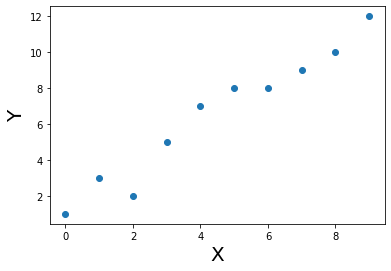

In [140]:
y = data['y']
x1 = data['x']

plt.scatter(x1, y)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.show()

In [141]:
x = sm.add_constant(x1)
model = sm.OLS(y, x).fit()

y_pred = model.predict(x)
print("R2 model: %f" % r2_score(y, y_pred))

model.summary()

R2 model: 0.952538


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     160.6
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           1.41e-06
Time:                        14:55:04   Log-Likelihood:                -11.312
No. Observations:                  10   AIC:                             26.62
Df Residuals:                       8   BIC:                             27.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2364      0.493      2.509      0.036       0.100       2.373
x              1.1697      0.092     12.671      0.000       0.957       1.383
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.392
Skew:                          -0.461   Prob(JB):                        0.822
Kurtosis:                       2.702   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

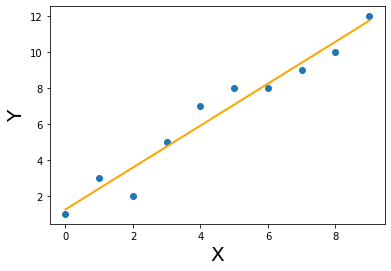

In [142]:
yhat = x1 * model.params['x'] + model.params['const']
plt.scatter(x1, y)
plt.plot(x1, yhat, lw=2, c='orange')
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data[['x']]
Y = data['y']

# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

Y_p = regr.predict(X)

print("R2: %f" % r2_score(Y, Y_p))

R2: 0.952538


In [144]:
regr.coef_

array([1.16969697])

In [145]:
regr.intercept_

1.2363636363636399

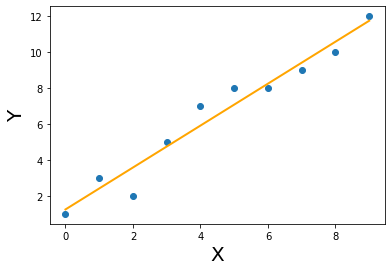

In [146]:
yhat = x1 * regr.coef_[0] + regr.intercept_
plt.scatter(X, Y)
plt.plot(X, yhat, lw=2, c='orange')
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

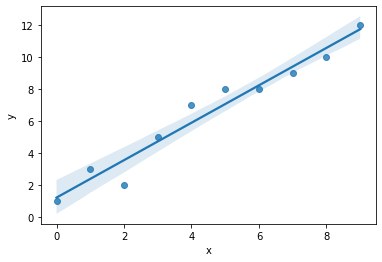

In [148]:
ax = sns.regplot(x=X, y=Y)
plt.show()

<a id='section2'></a>
## Prezzi case

Hai un dataset coi pressi delle case.

I dati sono salvati nel file: 'real_estate_price_size.csv'. 

Devi creare una regressione lineare semplice, utilizzando i dati.

In questo esercizio la veriabile dipendente sarà 'price', mentre la variaibli indipendente sarà 'size'.

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [151]:
data = pd.read_csv('data/real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [152]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [153]:
data.corr()

,price,size
price,1.000000,0.862983
size,0.862983,1.000000


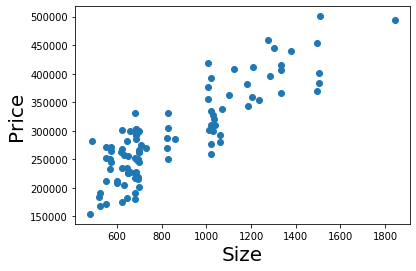

In [154]:
y = data['price']
x1 = data['size']

plt.scatter(x1, y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size=0.2)

x = sm.add_constant(X_train)
results = sm.OLS(Y_train, x).fit()

y_pred_train = results.predict(x)
y_pred_test = results.predict(sm.add_constant(X_test))

print("R2 model on training data: %f" % r2_score(Y_train, y_pred_train))
print("R2 model on test data: %f" % r2_score(Y_test, y_pred_test))

results.summary()

R2 model on training data: 0.756896
R2 model on test data: 0.694599


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     242.8
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           1.15e-25
Time:                        14:56:47   Log-Likelihood:                -956.14
No. Observations:                  80   AIC:                             1916.
Df Residuals:                      78   BIC:                             1921.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.023e+05   1.29e+04      7.960      0.000    7.67e+04    1.28e+05
size         225.2290     14.453     15.584      0.000     196.455     254.003
==============================================================================
Omnibus:                        2.824   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                1.994
Skew:                           0.199   Prob(JB):                        0.369
Kurtosis:                       2.337   Cond. No.                     2.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

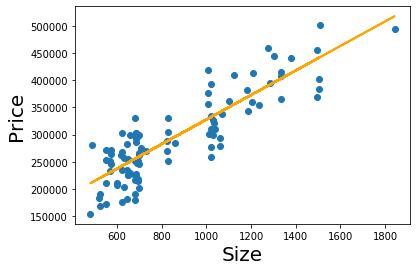

In [156]:
plt.scatter(x1, y)

yhat = x1 * results.params['size'] + results.params['const']
fig = plt.plot(x1, yhat, lw=2, c='orange')

plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

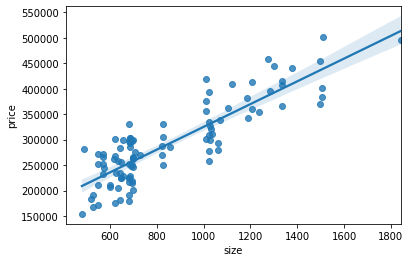

In [157]:
ax = sns.regplot(x=x1, y=y)
plt.show()

In [160]:
import plotly.express as px

fig = px.scatter(data, x='size', y="price", marginal_y="violin", marginal_x="box", trendline="ols")
fig.show()

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['size']]
Y = data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# with sklearn
regr = LinearRegression()
regr.fit(X_train, Y_train)

Y_pred_train = regr.predict(X_train) # eseguiamo la predizione sul train set
Y_pred_test = regr.predict(X_test) # eseguiamo la predizione anche sul test set

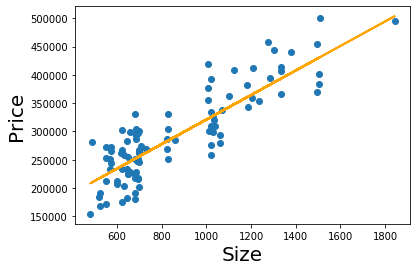

In [165]:
plt.scatter(X, Y)

yhat = x1 * regr.coef_[0] + regr.intercept_
fig = plt.plot(x1, yhat, lw=2, c='orange')

plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

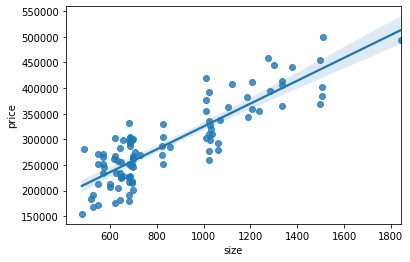

In [166]:
ax = sns.regplot(x=X, y=Y)
plt.show()

In [167]:
import plotly.express as px

fig = px.scatter(data, x='size', y="price", marginal_y="violin", marginal_x="box", trendline="ols")
fig.show()

<a id='section3'></a>
## Regressione multipla

Effettuare una regressione multipla sui dati contenuti nel file 'ex1data2.csv' ce contiene i dati dei prezzi delle case (variabile dipendente) e i dati sul numero di stanze e la dimensione della casa (variabili indipendenti).

In [168]:
import numpy as np

data = pd.read_csv('data/ex1data2.csv')
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


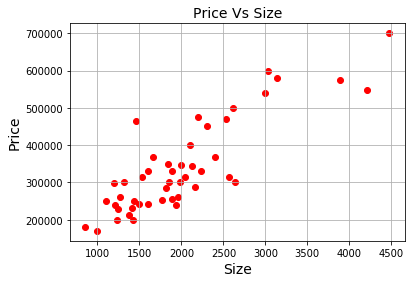

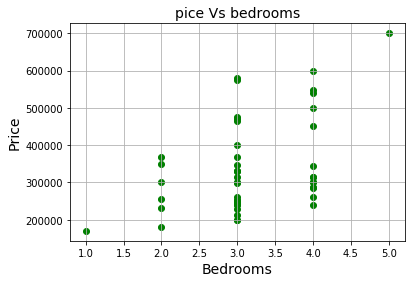

In [169]:
# First correlation
plt.scatter(data['size'], data['price'], color='red')
plt.title('Price Vs Size', fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()
 
# Second correlation
plt.scatter(data['bedrooms'], data['price'], color='green')
plt.title('pice Vs bedrooms', fontsize=14)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [170]:
data[['price','size']].corr()

,price,size
price,1.000000,0.854988
size,0.854988,1.000000


In [171]:
data[['price','bedrooms']].corr()

,price,bedrooms
price,1.000000,0.442261
bedrooms,0.442261,1.000000


In [172]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = data[['size', 'bedrooms']]
Y = data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_train = sm.add_constant(X_train) # adding a constant
X_test = sm.add_constant(X_test) # adding a constant

model = sm.OLS(Y_train, X_train).fit(normalize=True)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("R2 model on training data: %f" % r2_score(Y_train, Y_train_pred))
print("R2 model on test data: %f" % r2_score(Y_test, Y_test_pred))

model.summary()

R2 model on training data: 0.748980
R2 model on test data: 0.645884


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     41.77
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           3.94e-09
Time:                        14:58:37   Log-Likelihood:                -385.78
No. Observations:                  31   AIC:                             777.6
Df Residuals:                      28   BIC:                             781.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.359e+05   5.48e+04      2.478      0.019    2.36e+04    2.48e+05
size         130.5640     15.824      8.251      0.000      98.149     162.979
bedrooms   -1.572e+04   1.95e+04     -0.807      0.426   -5.56e+04    2.42e+04
==============================================================================
Omnibus:                        4.820   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.213
Skew:                           0.698   Prob(JB):                        0.201
Kurtosis:                       3.734   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visualizziamo i dati:

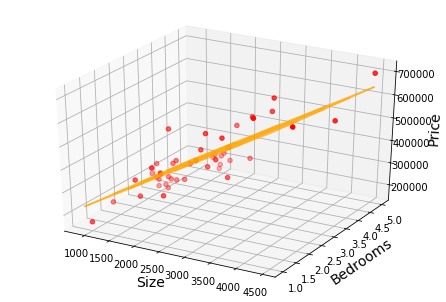

In [173]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
plt3d = fig.gca(projection='3d')

ax = Axes3D(fig)
ax.scatter(data['size'], data['bedrooms'], data['price'], color='red')
ax.set_xlabel('Size', fontsize=14)
ax.set_ylabel('Bedrooms', fontsize=14)
ax.set_zlabel('Price', fontsize=14)

x = np.linspace(data['size'].min(), data['size'].max(), 5)
y = np.linspace(data['bedrooms'].min(), data['bedrooms'].max(), 5)
x, y = np.meshgrid(x, y)

z = model.params['const'] + model.params['size'] * x + model.params['bedrooms'] * y
z = z.reshape(x.shape)

ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

plt.show()

In [194]:
import plotly.graph_objects as go

x = np.linspace(data['size'].min(), data['size'].max(), 5)
y = np.linspace(data['bedrooms'].min(), data['bedrooms'].max(), 5)
x, y = np.meshgrid(x, y)

z = model.params['const'] + model.params['size'] * x + model.params['bedrooms'] * y
z = z.reshape(x.shape)

make_int = np.vectorize(int)
cmap = plt.get_cmap("tab10")
mycolors = make_int(256*np.array(cmap(1)[0:3])).reshape((1, 1,-1)).repeat(21, axis = 0).repeat(21, axis =1)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=data['size'], y=data['bedrooms'], z=data['price'], mode='markers'))
fig.add_trace(go.Surface(x=x, y=y, z=z, surfacecolor=mycolors, opacity=.3, showscale=False))

fig.show()

<a id='section4'></a>
## Regressione multipla SerieA

Leggendo i dati della classifica di SerieA provare a impostare un modello per calcolare una regressione multipla tra i gol fatti e subiti e i punti in classifica.

In [196]:
classifica_serie_a = pd.read_html(io="http://www.legaseriea.it/it/serie-a/classifica", skiprows=1, header=0)
dataset = classifica_serie_a[0]
dataset

,SQUADRE,PUNTI,G,V,N,P,G.1,V.1,N.1,P.1,G.2,V.2,N.2,P.2,F,S
0,1 Juventus,63,26,20,3,3,13,12,1,0,13,8,2,3,50,24
1,2 Lazio,62,26,19,5,2,14,11,3,0,12,8,2,2,60,23
2,3 Inter,54,25,16,6,3,12,7,4,1,13,9,2,2,49,24
3,4 Atalanta,48,25,14,6,5,12,6,2,4,13,8,4,1,70,34
4,5 Roma,45,26,13,6,7,13,6,3,4,13,7,3,3,51,35
5,6 Napoli,39,26,11,6,9,13,5,2,6,13,6,4,3,41,36
6,7 Milan,36,26,10,6,10,13,4,5,4,13,6,1,6,28,34
7,8 Hellas Verona,35,25,9,8,8,12,6,3,3,13,3,5,5,29,26
8,9 Parma,35,25,10,5,10,13,6,1,6,12,4,4,4,32,31
9,10 Bologna,34,26,9,7,10,13,4,5,4,13,5,2,6,38,42


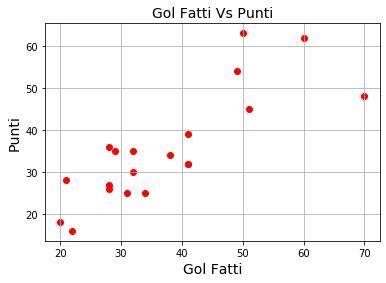

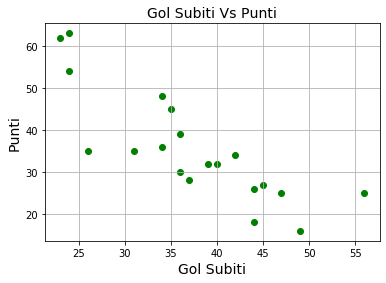

In [197]:
# First correlation
plt.scatter(dataset['F'], dataset['PUNTI'], color='red')
plt.title('Gol Fatti Vs Punti', fontsize=14)
plt.xlabel('Gol Fatti', fontsize=14)
plt.ylabel('Punti', fontsize=14)
plt.grid(True)
plt.show()
 
# Second correlation
plt.scatter(dataset['S'], dataset['PUNTI'], color='green')
plt.title('Gol Subiti Vs Punti', fontsize=14)
plt.xlabel('Gol Subiti', fontsize=14)
plt.ylabel('Punti', fontsize=14)
plt.grid(True)
plt.show()

In [198]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = dataset[['F', 'S']]
Y = dataset['PUNTI']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_train = sm.add_constant(X_train) # adding a constant
X_test = sm.add_constant(X_test) # adding a constant

model = sm.OLS(Y_train, X_train).fit(normalize=True)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("R2 model on training data: %f" % r2_score(Y_train, Y_train_pred))
print("R2 model on test data: %f" % r2_score(Y_test, Y_test_pred))

R2 model on training data: 0.920030
R2 model on test data: 0.698300


In [199]:
import plotly.graph_objects as go

x = np.linspace(dataset['F'].min(), dataset['F'].max(), 5)
y = np.linspace(dataset['S'].min(), dataset['S'].max(), 5)
x, y = np.meshgrid(x, y)

z = model.params['const'] + model.params['F'] * x + model.params['S'] * y
z = z.reshape(x.shape)

make_int = np.vectorize(int)
cmap = plt.get_cmap("tab10")
mycolors = make_int(256*np.array(cmap(1)[0:3])).reshape((1, 1,-1)).repeat(21, axis = 0).repeat(21, axis =1)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dataset['F'], y=dataset['S'], z=dataset['PUNTI'], mode='markers'))
fig.add_trace(go.Surface(x=x, y=y, z=z, surfacecolor=mycolors, opacity=.3, showscale=False))

fig.show()

Proviamo ora a fare regressioni multiple sui parametri già considerati durante la scorsa lezione:

In [201]:
dataset[['PUNTI', 'V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']].corr()

,PUNTI,V.1,N.1,P.1,V.2,N.2,P.2,F,S
PUNTI,1.000000,0.914411,-0.125256,-0.905983,0.876874,0.029278,-0.837259,0.824177,-0.827887
V.1,0.914411,1.000000,-0.348615,-0.851585,0.634148,0.110579,-0.704984,0.668825,-0.818996
N.1,-0.125256,-0.348615,1.000000,-0.143741,0.057298,-0.400834,0.206448,-0.195650,0.140757
P.1,-0.905983,-0.851585,-0.143741,1.000000,-0.731996,0.059682,0.641174,-0.611378,0.819463
V.2,0.876874,0.634148,0.057298,-0.731996,1.000000,-0.236774,-0.726657,0.802543,-0.632176
N.2,0.029278,0.110579,-0.400834,0.059682,-0.236774,1.000000,-0.439118,0.195997,-0.133365
P.2,-0.837259,-0.704984,0.206448,0.641174,-0.726657,-0.439118,1.000000,-0.883133,0.689797
F,0.824177,0.668825,-0.195650,-0.611378,0.802543,0.195997,-0.883133,1.000000,-0.512793
S,-0.827887,-0.818996,0.140757,0.819463,-0.632176,-0.133365,0.689797,-0.512793,1.000000


In [202]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = dataset[['V.1', 'N.1', 'P.1', 'V.2', 'N.2', 'P.2', 'F', 'S']]
Y = dataset['PUNTI']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_train = sm.add_constant(X_train) # adding a constant
X_test = sm.add_constant(X_test) # adding a constant

model = sm.OLS(Y_train, X_train).fit(normalize=True)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("R2 model on training data: %f" % r2_score(Y_train, Y_train_pred))
print("R2 model on test data: %f" % r2_score(Y_test, Y_test_pred))

R2 model on training data: 1.000000
R2 model on test data: 1.000000
